# Compare optimizer

In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base_qtm, qtm.constant, qtm.qtm_1qubit

In [2]:
# Theta, phi, lambdaz is the params of u3 gate
theta = np.random.uniform(0, np.pi)
phi = np.random.uniform(0, 2*np.pi)
lambdaz = 0

In [3]:
# Init quantum tomography 1 qubit
thetas = np.zeros((3,))
loss_values = []
qc = qiskit.QuantumCircuit(1, 1)
qc.u3(theta, phi, lambdaz, 0)
# Reduce loss value in 100 steps
thetas, loss_values_sgd = qtm.base_qtm.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.qtm_1qubit.u_1qubit_h, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.sgd,
    verbose = 1,
    wire = 0
)


C:\Users\haime\AppData\Local\Temp/ipykernel_352/1080077060.py:5: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(theta, phi, lambdaz, 0)
Step: 100%|██████████| 100/100 [00:18<00:00,  5.30it/s]


In [4]:
# Init quantum tomography 1 qubit
thetas = np.zeros((3,))
loss_values = []
qc = qiskit.QuantumCircuit(1, 1)
qc.u3(theta, phi, lambdaz, 0)
# Reduce loss value in 100 steps
thetas, loss_values_adam = qtm.base_qtm.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.qtm_1qubit.u_1qubit_h, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.adam,
    verbose = 1,
    wire = 0
)


Step: 100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


In [5]:
# Init quantum tomography 1 qubit
thetas = np.zeros((3,))
loss_values = []
qc = qiskit.QuantumCircuit(1, 1)
qc.u3(theta, phi, lambdaz, 0)
# Reduce loss value in 100 steps
thetas, loss_values_qng = qtm.base_qtm.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.qtm_1qubit.u_1qubit_h, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.qng,
    verbose = 1,
    wire = 0
)


Step:  21%|██        | 21/100 [00:04<00:15,  5.16it/s]

KeyboardInterrupt: 

In [ ]:
# Init quantum tomography 1 qubit
thetas = np.zeros((3,))
loss_values = []
qc = qiskit.QuantumCircuit(1, 1)
qc.u3(theta, phi, lambdaz, 0)
# Reduce loss value in 100 steps
thetas, loss_values_qng_adam = qtm.base_qtm.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.qtm_1qubit.u_1qubit_h, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.qng_adam,
    verbose = 1,
    wire = 0
)


Step: 100%|██████████| 100/100 [00:30<00:00,  3.29it/s]


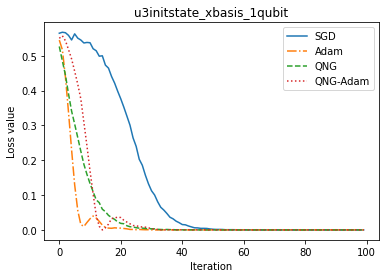

In [ ]:
# Plot loss value in 100 steps
plt.show()
plt.plot(loss_values_sgd, label='SGD', linestyle = '-')
plt.plot(loss_values_adam, label='Adam', linestyle = '-.')
plt.plot(loss_values_qng, label='QNG', linestyle = '--')
plt.plot(loss_values_qng_adam, label='QNG-Adam', linestyle = ':')
plt.title('u3initstate_xbasis_1qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('u3initstate_xbasis_1qubit.png', format='png', dpi=600)
plt.show() 

In [14]:
np.savetxt("./compare/u3initstate_xbasis_1qubit/loss_values_sgd.csv", loss_values_sgd, delimiter=",")
np.savetxt("./compare/u3initstate_xbasis_1qubit/loss_values_adam.csv", loss_values_adam, delimiter=",")
np.savetxt("./compare/u3initstate_xbasis_1qubit/loss_values_qng.csv", loss_values_qng, delimiter=",")
np.savetxt("./compare/u3initstate_xbasis_1qubit/loss_values_qng_adam.csv", loss_values_qng_adam, delimiter=",")